105. Construct Binary Tree from Preorder and Inorder Traversal

Given two integer arrays preorder and inorder where preorder is the preorder traversal of a binary tree and inorder is the inorder traversal of the same tree, construct and return the binary tree.

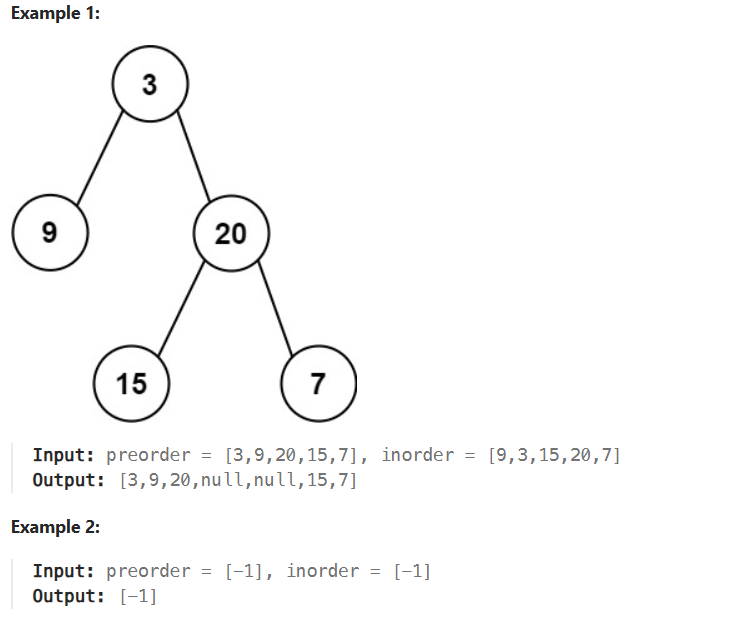

In [ ]:
class Solution(object):
    def buildTree(self, preorder, inorder):
        if not preorder or not inorder:
            return None

        root_val = preorder[0]
        tree = TreeNode(root_val)
        root_idx_in_inorder = inorder.index(root_val)
        
        # create left and right inorders - list of element which belong to left and right subtrees
        left_tree_elems = inorder[:root_idx_in_inorder]
        right_tree_elems = inorder[root_idx_in_inorder + 1:]

        # create left and right preorders based on length of new inorders
        left_preorder = preorder[1 : 1 + len(left_tree_elems)]
        right_preorder = preorder[1 + len(left_tree_elems) :]

        
        tree.left = self.buildTree(left_preorder, left_tree_elems)
        tree.right = self.buildTree(right_preorder, right_tree_elems)


        return tree

In [ ]:
# Development

In [1]:
preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]

In [2]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [57]:
from collections import deque

def construct_tree(preorder, inorder):
    if not preorder or not inorder:
        return None

    root_val = preorder[0]
    tree = TreeNode(root_val)
    root_idx_in_inorder = inorder.index(root_val)
    
    # create left and right inorders - list of element which belong to left and right subtrees
    left_tree_elems = inorder[:root_idx_in_inorder]
    right_tree_elems = inorder[root_idx_in_inorder + 1:]

    # create left and right preorders based on length of new inorders
    left_preorder = preorder[1 : 1 + len(left_tree_elems)]
    right_preorder = preorder[1 + len(left_tree_elems) :]

    
    tree.left = construct_tree(left_preorder, left_tree_elems)
    tree.right = construct_tree(right_preorder, right_tree_elems)


    return tree
        
tree = construct_tree(preorder, inorder)       
tree

In [60]:
# Help function to make list representation of the tree by levels

def tree_to_list_by_levels(tree):
    res_list = []
    q = deque()
    q.append(tree)
    res_list.append(tree.val)

    while q:
        node = q.popleft()
        # res_list.append(node.val)
        if node.left:
            q.append(node.left)
            res_list.append(node.left.val)
        else:            
            res_list.append("null")
        

        if node.right:
            q.append(node.right)
            res_list.append(node.right.val)
        else:            
            res_list.append("null")

    return res_list

tree_to_list_by_levels(tree)

[3, 9, 20, 'null', 'null', 15, 7, 'null', 'null', 'null', 'null']